## README.txt

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images  
from 233 patients with three kinds of brain tumor: meningioma (708 slices),  
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size  
limit of repository, we split the whole dataset into 4 subsets, and achive   
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold  
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct  
containing the following fields for an image:  

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor  
cjdata.PID: patient ID  
cjdata.image: image data  
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.  
- For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.  
- It was generated by manually delineating the tumor border. So we can use it to generate  
- binary image of tumor mask.  
cjdata.tumorMask: a binary image with 1s indicating tumor region  

-----
This data was used in the following paper:
1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).
2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on github 
https://github.com/chengjun583/brainTumorRetrieval

-----
Jun Cheng
School of Biomedical Engineering
Southern Medical University, Guangzhou, China
Email: chengjun583@qq.com



In [1]:
import os
import h5py
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

data_root = "../mri_example/data"
mat_list = os.listdir(data_root)

In [2]:
# Load mat file

for mat_file in mat_list:
    mat_path = os.path.join(data_root, mat_file)
    mat = h5py.File(mat_path, "r")
    break

In [3]:
# cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor  

print(mat['cjdata']['label'].__array__().shape) # (1, 1)
print(mat['cjdata']['label'].__array__()) # [[1.]] or [[2.]] or [[3.]]

(1, 1)
[[1.]]


In [4]:
# cjdata.PID: patient ID 

print(mat['cjdata']['PID'].__array__().shape)
print(mat['cjdata']['PID'].__array__())

(6, 1)
[[49]
 [48]
 [48]
 [51]
 [54]
 [48]]


(512, 512)
int16
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


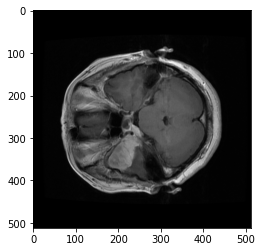

In [5]:
# cjdata.image: image data

img = mat['cjdata']['image'].__array__()
print(img.shape)
print(img.dtype)
print(img)

plt.imshow(img, cmap='gray')
plt.show()

(1, 38)
[[267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
  250.8892922  305.71324864 253.676951   318.72232305 249.9600726
  321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
  227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
  363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
  183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
  295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
  223.94192377 268.54446461 228.58802178]]


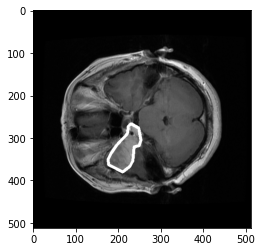

In [6]:
# cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.  
# - For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.  
# - It was generated by manually delineating the tumor border. So we can use it to generate  
# - binary image of tumor mask.  

pts = mat['cjdata']['tumorBorder'].__array__()
print(pts.shape)
print(pts)

n_pts = mat['cjdata']['tumorBorder'].__array__().shape[1]//2
pts = (np.reshape(pts, [n_pts, 2])).astype(np.uint16).tolist()
pts += [pts[0]]

border_img = (img.copy()/img.max()*255).astype(np.uint8)

for i in range(n_pts):
    pt1 = pts[i][::-1]
    pt2 = pts[i+1][::-1]

    border_img = cv.line(border_img, pt1, pt2, 255, 5)

plt.imshow(border_img, cmap='gray')
plt.show()

(512, 512)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


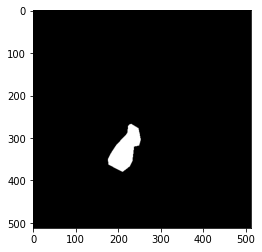

In [7]:
# cjdata.tumorMask: a binary image with 1s indicating tumor region  

mask = mat['cjdata']['tumorMask'].__array__()
print(mask.shape)
print(mask)

plt.imshow(mask, cmap='gray')
plt.show()

In [8]:
# The 5-fold cross-validation indices are also provided.

cvind = h5py.File('/Volumes/SD/Git/Jerry/BTS_example/mri_example/cvind.mat', 'r')
cv_indices = cvind['cvind'].__array__()
print(cv_indices.shape)
print(cv_indices)

(1, 3064)
[[5. 5. 5. ... 4. 2. 1.]]
